In [1]:
import numpy as np
import pandas as pd

Tasks to work on:
- Displaying both video together.  Displaying  two channels with two different colors?
- Working on automating threshold
- Work on tracking spots through time
- to reduce noise track spot through time and only keep ones that last multiple z-stacks (possible strategy to reduce noise)
- prepare questions for meeting with scikit image people
Start new notebooks to tackle topics

In [2]:
import czifile
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import seaborn as sns

from IPython.display import HTML #to display movie
%matplotlib inline 

In [3]:
#potential goal is to track the dots through time and reduce noise in the movie

In [4]:
#CODE FROM PREVIOUS NOTEBOOK

#make into a function later
array1 = czifile.imread("/Users/samanthatang/Desktop/stack_data/dmel_st14__i_63x-02.czi")
array2 = czifile.imread("/Users/samanthatang/Desktop/stack_data/dmel_st14__i_63x-03.czi")
array3 = czifile.imread("/Users/samanthatang/Desktop/stack_data/dmel_st14__i_63x-04.czi")
# array4 = czifile.imread("/Users/samanthatang/Desktop/stack_data/dmel_st14__i_63x-05.czi") #may download more later after clear up storage


## time, channel, z-stack, y-axis, and x-axis
print(np.shape(array1))
print(np.shape(array2))
print(np.shape(array3))
# print(np.shape(array4))


array = np.append(array1, array2, axis=2)
array = np.append(array, array3, axis=2)
# array = np.append(array, array4, axis=2)

## Use squeeze to get rid of channels my data doesnt have.
array = array.squeeze()
print(np.shape(array))
# (time, channel, z-stack, y-axis, and x-axis)

(1, 1, 6, 2, 21, 928, 1389, 1)
(1, 1, 7, 2, 21, 928, 1389, 1)
(1, 1, 13, 2, 21, 928, 1389, 1)
(26, 2, 21, 928, 1389)


In [5]:
# #video of MP stacks
## Visualize full raw zstack
## One thing to keep in mind is that the last scan is likely always less than total
## We should drop the last z-stack = len(array)-1)
## - [ ] Is there a better way of doing this? Like do I have to have a starter array,
##       only to delete it later?


#based off of ciera's:

result_array =  np.zeros((1,928,1389))
type(result_array)

for i in range(1,len(array)-1):
    zstack_temp = array[i, 0, :, ...]
    result = np.expand_dims(np.max(zstack_temp, axis=0), axis = 0)
    result_array = np.append(result_array, result, axis = 0)

result_array = np.delete(result_array, 0, axis=0) # remove the empty starter array

np.shape(result_array)

(24, 928, 1389)

/Users/samanthatang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  
/Users/samanthatang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if __name__ == '__main__':


(22, 928, 1389)


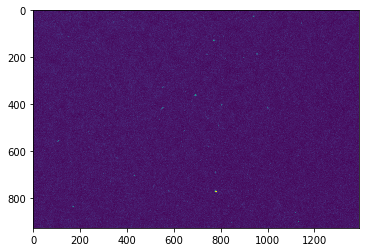

In [6]:
# There are several of the stacks that are not right, but not sure why
# - [ ] Fix this



result_array2 = result_array
## Manually remove
result_array2 = np.delete(result_array2, [31], axis=0)
result_array2 = np.delete(result_array2, [24], axis=0)
result_array2 = np.delete(result_array2, [11], axis=0)
result_array2 = np.delete(result_array2, [4], axis=0)

plt.figure()
plt.imshow(result_array2[3,:,:])

print(np.shape(result_array2))

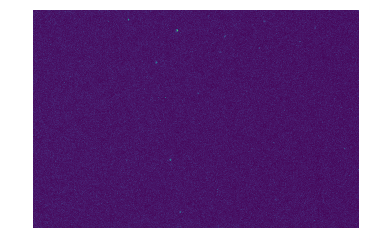

In [7]:
# go through each image in the z-stack

fig, ax = plt.subplots()
ax.axis('off') 
im = ax.imshow(result_array2[0, :, :])

def update(i): # setting up the first image
    # Update method - What you want your figure to look like every single time
    im.set_array(result_array2[i, :, :]) 
    return [im] #returned as a iterable object as a list.
    print(im)
    # frames is how long, by specifing how many images
    
movie = animation.FuncAnimation(fig, update, interval=500, frames=result_array2.shape[0], blit=True)
HTML(movie.to_html5_video()) 

#only have three here cuz computer has no storage to download more 
#modify the interval to make faster (smaller number) or faster (larger number)

In [12]:
# (time, channel, z-stack, y-axis, and x-axis), 0 is the dot's channel
array1
array1 = array1.squeeze() #get rid of unwanted channels
array1.shape
# TODO: make a function that will automatically clean up images

(6, 2, 21, 928, 1389)

In [13]:
# #going through maximum projections of all 6 time points for this image1
# fig, ax = plt.subplots(6, 2, figsize=(200, 400))
# for i in range(array1.shape[0]):
#     zstack = array1[i, 0, :, ...] #MS2 (dots)
#     IM_MAX = np.max(zstack, axis=0) #maximum projection 
    
#     ax[i, 0].imshow(IM_MAX)
#     ax[i, 1].imshow(IM_MAX[0:150, 500:700]) #need to crop better cuz dot moves out of cropped image
# #     plt.show() #what is the last max projection showing? 

#     #there's so much more noise than the previous image i looked at!


#commented out cuz freezes computer (BUT useful for looking through images)

In [14]:
# looks like an interesting/useful example on blob detection: 
# https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_blob.html#sphx-glr-auto-examples-features-detection-plot-blob-py

In [15]:
from skimage.feature import blob_doh, blob_dog
from skimage.color import rgb2gray #to turn into grayscale

# array1 (first time point)

In [16]:
zstack = array1[1, 0, :, ...] #MS2 (dots) #FIRST TIMEPOINT
IM_MAX = np.max(zstack, axis=0) #maximum projection 
image_gray = rgb2gray(IM_MAX)
image_gray

array([[ 7453,  7628, 10789, ...,  6989,  8890,  6306],
       [ 6192,  9964,  7815, ...,  6735,  6735,  8884],
       [ 8016,  6504,  7239, ...,  7568,  5915,  7384],
       ...,
       [ 8899,  9331,  7779, ...,  8431,  5919,  6754],
       [ 6978,  5778,  7388, ...,  6101,  4978,  4338],
       [ 7466,  6192,  6610, ...,  7342,  4612,  6162]], dtype=uint16)

In [27]:
blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.005) #smaller threshold captures more faint dots
blobs_doh #returns the coordinates of blobs and the std deviation from kernal? see documentation

#I have the coordinates now, so at least i can use these coordinates as labels? or to track dots 
#(i.e. locate dots that are plus/minus a few x and y's away from before?)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.05) #smaller threshold captures more faint dots
blobs_dog, blobs_doh

(array([[ 879.   , 1180.   ,    2.56 ],
        [ 756.   ,  781.   ,    4.096],
        [ 705.   ,  918.   ,    2.56 ],
        [ 681.   ,  487.   ,    4.096],
        [ 680.   ,  756.   ,    2.56 ],
        [ 604.   , 1111.   ,    2.56 ],
        [ 566.   , 1259.   ,    2.56 ],
        [ 564.   ,  831.   ,    2.56 ],
        [ 533.   ,  919.   ,    2.56 ],
        [ 515.   ,  634.   ,    2.56 ],
        [ 472.   , 1203.   ,    2.56 ],
        [ 458.   ,  744.   ,    2.56 ],
        [ 431.   ,  350.   ,    4.096],
        [ 415.   ,  565.   ,    2.56 ],
        [ 366.   ,  677.   ,    4.096],
        [ 343.   ,  558.   ,    2.56 ],
        [ 326.   , 1058.   ,    2.56 ],
        [ 319.   ,  984.   ,    4.096],
        [ 270.   ,  593.   ,    2.56 ],
        [ 243.   ,  491.   ,    2.56 ],
        [ 208.   ,  718.   ,    2.56 ],
        [ 145.   ,  769.   ,    4.096],
        [ 131.   ,  165.   ,    2.56 ],
        [  56.   ,  348.   ,    4.096],
        [  50.   ,  717.   ,    2.56 ],


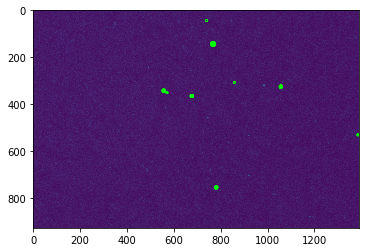

In [28]:
# colors = ['yellow', 'lime']
# titles = ['blob 1', 'blob 2']


fig, ax = plt.subplots() #created ax just to add patches
plt.imshow(IM_MAX)

for idx in range(len(blobs_doh)):
    for blob in blobs_doh: 
        y, x, r = blob
        c = plt.Circle((x, y), r, color="lime", linewidth=2, fill=False)
        ax.add_patch(c)

#still don't know how to automate, but at least i can locate all dots much better than before
#can try out the other two methods as well
# https://en.wikipedia.org/wiki/Blob_detection#The_determinant_of_the_Hessian (blob detection algorithm)


# notice too, (when the size of the circles are larger), that there seems to be redundant (x, y) coordiates 
# locating the same or similar areas (perhaps because of noise? and threshold is lowered so that noise is captured?)

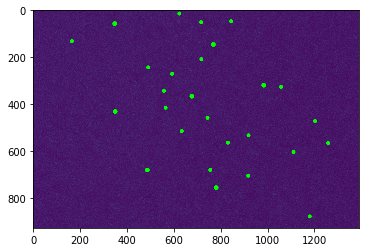

In [29]:
fig, ax = plt.subplots() #created ax just to add patches
plt.imshow(IM_MAX)

for idx in range(len(blobs_doh)):
    for blob in blobs_dog: 
        y, x, r = blob
        c = plt.Circle((x, y), r, color="lime", linewidth=2, fill=False)
        ax.add_patch(c)

# second time point
(attemp to track/mark corresponding dots)

In [20]:
zstack = array1[2, 0, :, ...] #MS2 (dots) #2nd TIMEPOINT
IM_MAX2 = np.max(zstack, axis=0) #maximum projection 
image_gray2 = rgb2gray(IM_MAX2)
image_gray2

array([[9358, 8053, 8083, ..., 6129, 7047, 6971],
       [9405, 9446, 7737, ..., 6711, 7630, 7965],
       [7401, 7345, 8425, ..., 7492, 8340, 7012],
       ...,
       [6896, 7128, 8279, ..., 6853, 7228, 7724],
       [6962, 6478, 6774, ..., 7626, 6773, 8573],
       [7805, 7694, 9086, ..., 6523, 6106, 6753]], dtype=uint16)

In [21]:
blobs_doh2 = blob_doh(image_gray2, max_sigma=30, threshold=.005) #smaller threshold captures more faint dots
blobs_doh2

array([[8.59000000e+02, 1.28300000e+03, 1.00000000e+00],
       [7.69000000e+02, 7.88000000e+02, 4.22222222e+00],
       [6.21000000e+02, 4.36000000e+02, 1.00000000e+00],
       [4.19000000e+02, 1.33000000e+02, 1.00000000e+00],
       [4.00000000e+02, 8.02000000e+02, 4.22222222e+00],
       [3.53000000e+02, 6.82000000e+02, 4.22222222e+00],
       [2.34000000e+02, 7.27000000e+02, 1.00000000e+00],
       [1.28000000e+02, 7.73000000e+02, 4.22222222e+00]])

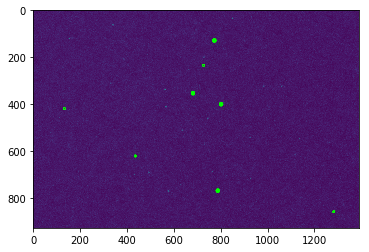

In [22]:
fig, ax = plt.subplots() #created ax just to add patches
plt.imshow(IM_MAX2)

for idx in range(len(blobs_doh2)):
    for blob in blobs_doh2: 
        y, x, r = blob
        c = plt.Circle((x, y), r, color="lime", linewidth=2, fill=False, )
        ax.add_patch(c)

In [23]:
len(blobs_doh), len(blobs_doh2)

(9, 8)

In [24]:
blobs_doh, blobs_doh2

(array([[7.55000000e+02, 7.81000000e+02, 4.22222222e+00],
        [5.31000000e+02, 1.38600000e+03, 1.00000000e+00],
        [3.65000000e+02, 6.77000000e+02, 4.22222222e+00],
        [3.51000000e+02, 5.71000000e+02, 1.00000000e+00],
        [3.42000000e+02, 5.57000000e+02, 4.22222222e+00],
        [3.25000000e+02, 1.05700000e+03, 4.22222222e+00],
        [3.07000000e+02, 8.58000000e+02, 1.00000000e+00],
        [1.43000000e+02, 7.68000000e+02, 7.44444444e+00],
        [4.30000000e+01, 7.40000000e+02, 1.00000000e+00]]),
 array([[8.59000000e+02, 1.28300000e+03, 1.00000000e+00],
        [7.69000000e+02, 7.88000000e+02, 4.22222222e+00],
        [6.21000000e+02, 4.36000000e+02, 1.00000000e+00],
        [4.19000000e+02, 1.33000000e+02, 1.00000000e+00],
        [4.00000000e+02, 8.02000000e+02, 4.22222222e+00],
        [3.53000000e+02, 6.82000000e+02, 4.22222222e+00],
        [2.34000000e+02, 7.27000000e+02, 1.00000000e+00],
        [1.28000000e+02, 7.73000000e+02, 4.22222222e+00]]))

In [43]:
#make into dataframe first (no cleaning)
x = [arr[1] for arr in blobs_doh] #note, the x and y coordinates are returned in opposite order hence the indexing
y = [arr[0] for arr in blobs_doh]
sd = [arr[2] for arr in blobs_doh]

x2 = [arr[1] for arr in blobs_doh2] #note, the x and y coordinates are returned in opposite order hence the indexing
y2 = [arr[0] for arr in blobs_doh2]
sd2 = [arr[2] for arr in blobs_doh2]



In [45]:
timepoint_1 = pd.DataFrame({"dots": np.arange(1, len(blobs_doh)+1), "x":x, "y":y, "sd":sd})
timepoint_2 = pd.DataFrame({"dots": np.arange(1, len(blobs_doh2)+1), "x":x2, "y":y2, "sd":sd2})


timepoint_1

,dots,x,y,sd
0,1,781.0,755.0,4.222222
1,2,1386.0,531.0,1.000000
2,3,677.0,365.0,4.222222
3,4,571.0,351.0,1.000000
4,5,557.0,342.0,4.222222
5,6,1057.0,325.0,4.222222
6,7,858.0,307.0,1.000000
7,8,768.0,143.0,7.444444
8,9,740.0,43.0,1.000000


In [46]:
timepoint_2


,dots,x,y,sd
0,1,1283.0,859.0,1.000000
1,2,788.0,769.0,4.222222
2,3,436.0,621.0,1.000000
3,4,133.0,419.0,1.000000
4,5,802.0,400.0,4.222222
5,6,682.0,353.0,4.222222
6,7,727.0,234.0,1.000000
7,8,773.0,128.0,4.222222


Notice that there is 1 less dot in the second time point in comparison to the first time point. Some of the located dots are also different (at the same threshold). 

In [ ]:
#push this notebook
#151 koshland (on cieras lab) tmr (fri)
#get nuclei location (to generalize a coordinate area for dot locations)
#create functions to generalize process (later?, but at least do that for cleaning up array)

#want to track frequency of on and off dots (when/time)

#weka segmentation/see if it works in fiji? 